# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [2]:
field_size = 6

In [3]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [4]:
print(feromon_map)

[[-99.80418999   0.53583951   0.51434207   0.49935052   0.75785299
    0.57143848]
 [  0.53583951 -99.88179143   0.5501558    0.81575571   0.66996086
    0.82698407]
 [  0.51434207   0.5501558  -99.53990599   0.48240557   0.35198778
    0.424104  ]
 [  0.49935052   0.81575571   0.48240557 -99.43497526   0.2900813
    0.32346166]
 [  0.75785299   0.66996086   0.35198778   0.2900813  -99.22502941
    0.2000641 ]
 [  0.57143848   0.82698407   0.424104     0.32346166   0.2000641
  -99.04731848]]


In [5]:
print(distance_map)

[[-99.72808139   0.28154625   0.30145229   0.44250133   0.28184056
    0.64347047]
 [  0.28154625 -99.88362815   0.21958743   0.5067822    0.58283095
    0.52428507]
 [  0.30145229   0.21958743 -99.02042035   0.77286816   0.33061324
    0.58960217]
 [  0.44250133   0.5067822    0.77286816 -99.60355635   0.39368657
    0.69217588]
 [  0.28184056   0.58283095   0.33061324   0.39368657 -99.45555074
    0.58421843]
 [  0.64347047   0.52428507   0.58960217   0.69217588   0.58421843
  -99.30624326]]


In [6]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, field_size))

In [7]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [8]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [9]:
ant = Ant(walk_distance=field_size+1, a=1, b=2)
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*3, feromon_erosion_speed=0.9)


# Опыт со случайной расстановкой

In [10]:
results = list()
for num_of_iteration in range(1, 8):
    results.append(random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=feromon_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=5*i))

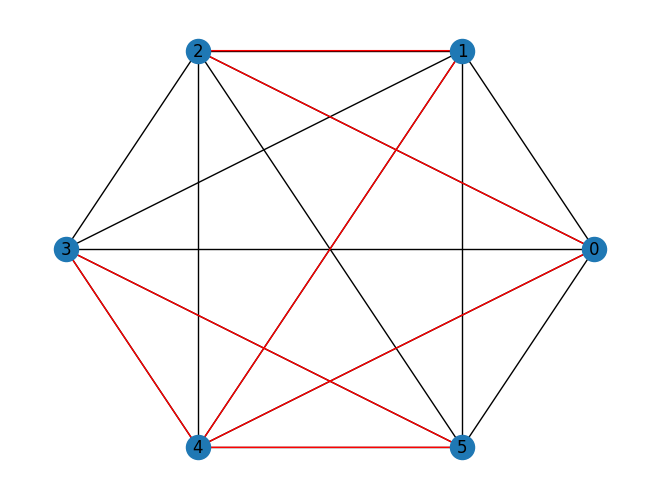

In [11]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True)


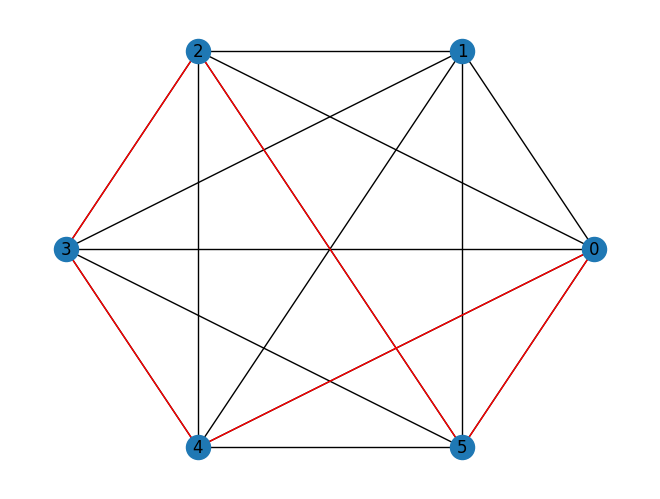

In [12]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K2 = nx.Graph()

for start, end, length in edges:
    K2.add_edge(start, end, length=length)


nx.draw_circular(K2, with_labels = True)
nx.draw_networkx_edges(K2, nx.circular_layout(K2), edgelist=edges_res, edge_color='r', arrows=True)


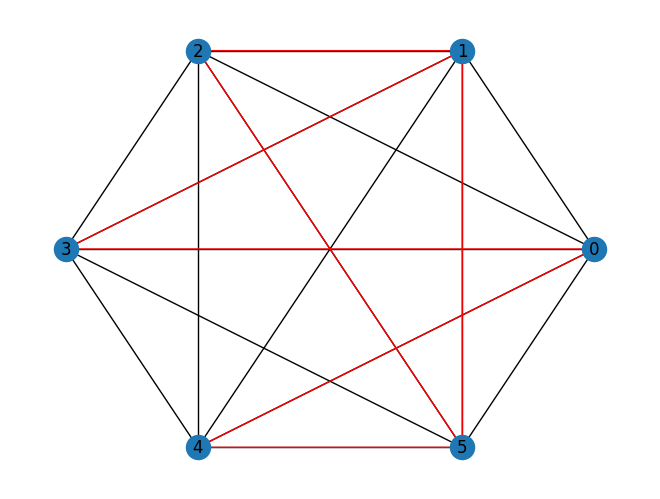

In [13]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K3 = nx.Graph()

for start, end, length in edges:
    K3.add_edge(start, end, length=length)


nx.draw_circular(K3, with_labels = True)
nx.draw_networkx_edges(K3, nx.circular_layout(K3), edgelist=edges_res, edge_color='r', arrows=True)


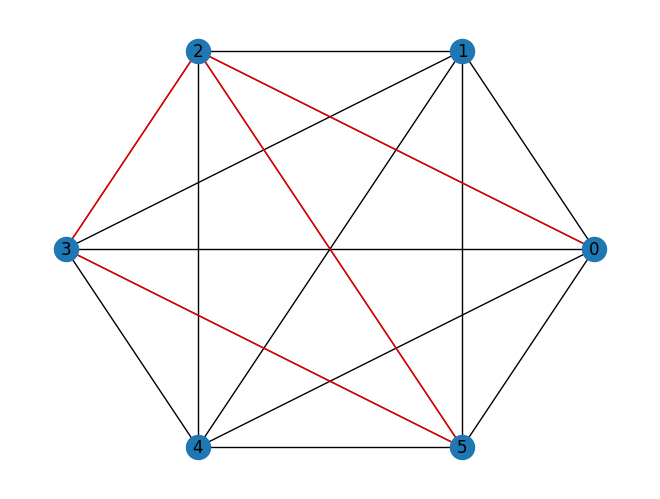

In [14]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K4 = nx.Graph()

for start, end, length in edges:
    K4.add_edge(start, end, length=length)


nx.draw_circular(K4, with_labels = True)
nx.draw_networkx_edges(K4, nx.circular_layout(K4), edgelist=edges_res, edge_color='r', arrows=True)


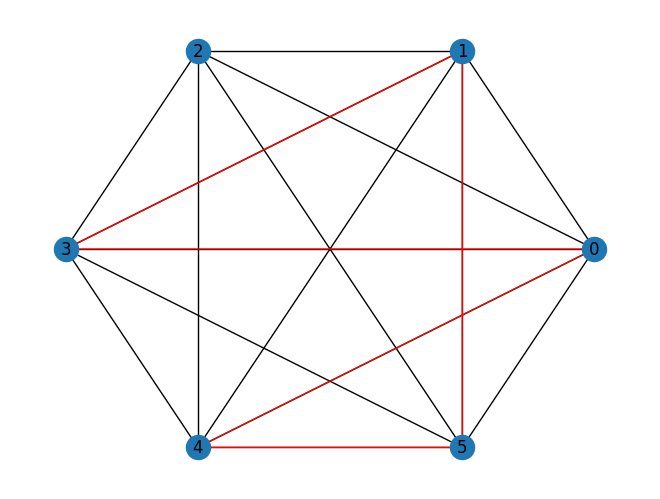

In [15]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K5 = nx.Graph()

for start, end, length in edges:
    K5.add_edge(start, end, length=length)


nx.draw_circular(K5, with_labels = True)
nx.draw_networkx_edges(K5, nx.circular_layout(K5), edgelist=edges_res, edge_color='r', arrows=True)


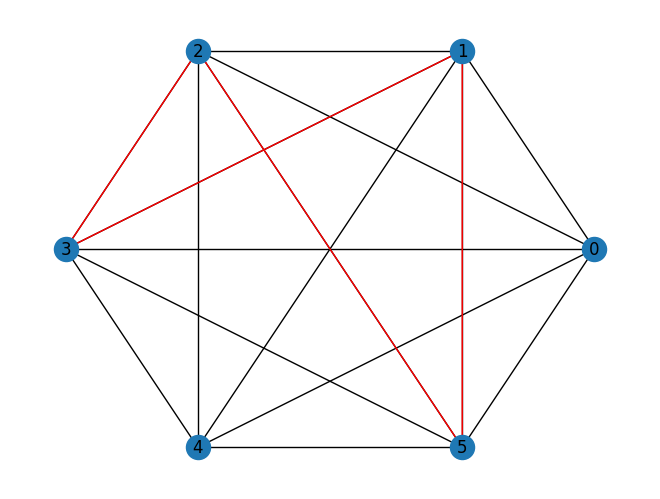

In [16]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K6 = nx.Graph()

for start, end, length in edges:
    K6.add_edge(start, end, length=length)


nx.draw_circular(K6, with_labels = True)
nx.draw_networkx_edges(K6, nx.circular_layout(K6), edgelist=edges_res, edge_color='r', arrows=True)


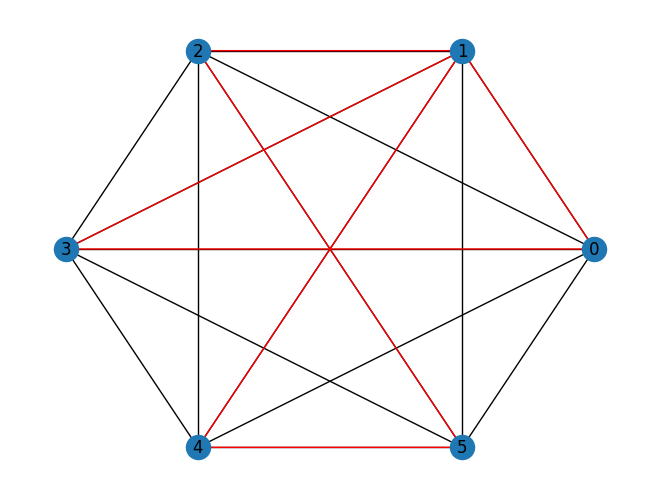

In [17]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K7 = nx.Graph()

for start, end, length in edges:
    K7.add_edge(start, end, length=length)


nx.draw_circular(K7, with_labels = True)
nx.draw_networkx_edges(K7, nx.circular_layout(K7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт с фиксированной расстановкой

In [18]:
results = list()
for num_of_iteration in range(1, 8):
    results.append(experement(ant=ant, 
                              pos=[1, 1],
                              feromon_map_updater=feromon_map_updater, 
                              feromon_map=feromon_map, 
                              distance_map=distance_map, 
                              num_of_iteration=5*i))

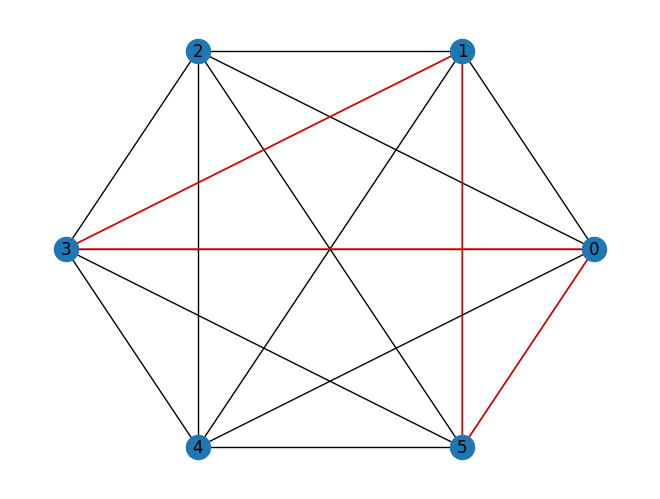

In [19]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True)


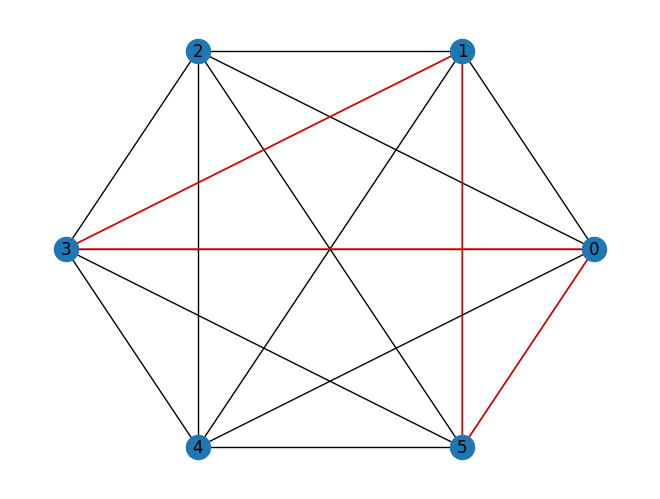

In [20]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K2 = nx.Graph()

for start, end, length in edges:
    K2.add_edge(start, end, length=length)


nx.draw_circular(K2, with_labels = True)
nx.draw_networkx_edges(K2, nx.circular_layout(K2), edgelist=edges_res, edge_color='r', arrows=True)


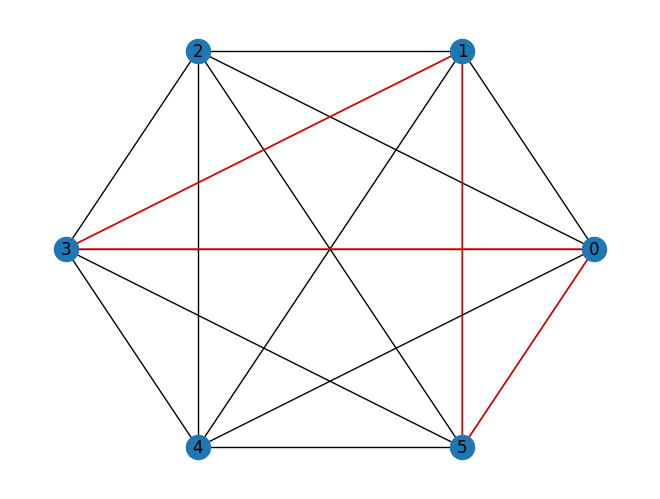

In [21]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K3 = nx.Graph()

for start, end, length in edges:
    K3.add_edge(start, end, length=length)


nx.draw_circular(K3, with_labels = True)
nx.draw_networkx_edges(K3, nx.circular_layout(K3), edgelist=edges_res, edge_color='r', arrows=True)


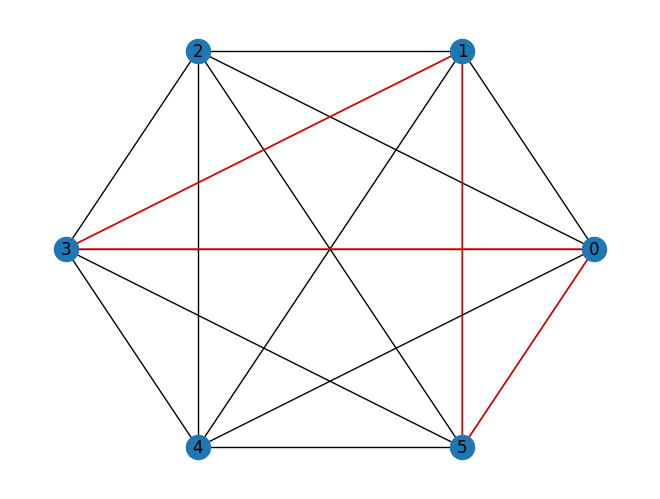

In [22]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K4 = nx.Graph()

for start, end, length in edges:
    K4.add_edge(start, end, length=length)


nx.draw_circular(K4, with_labels = True)
nx.draw_networkx_edges(K4, nx.circular_layout(K4), edgelist=edges_res, edge_color='r', arrows=True)


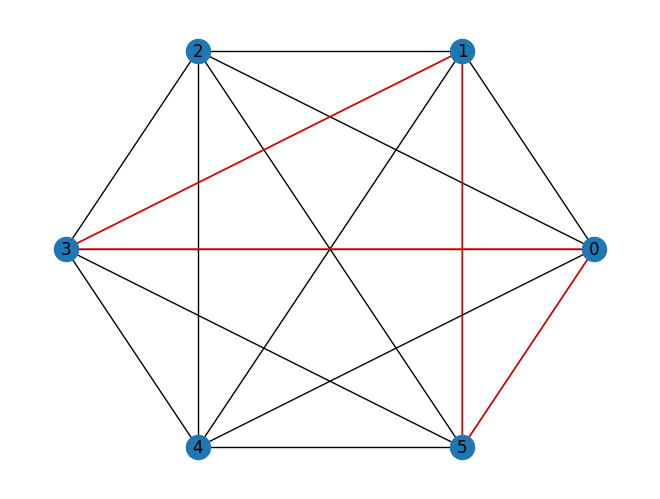

In [23]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K5 = nx.Graph()

for start, end, length in edges:
    K5.add_edge(start, end, length=length)


nx.draw_circular(K5, with_labels = True)
nx.draw_networkx_edges(K5, nx.circular_layout(K5), edgelist=edges_res, edge_color='r', arrows=True)


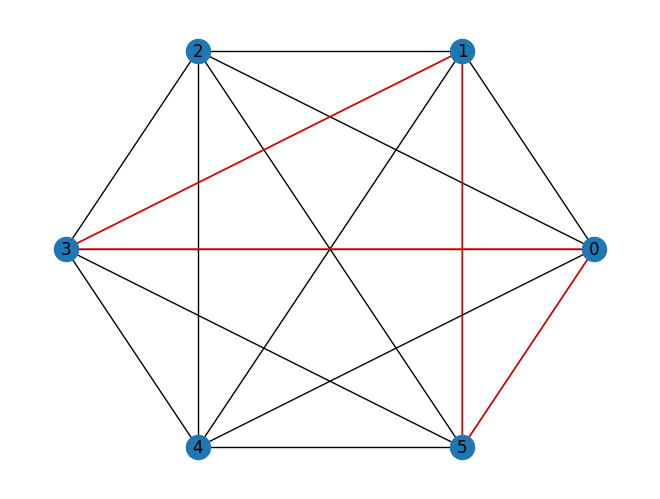

In [24]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K6 = nx.Graph()

for start, end, length in edges:
    K6.add_edge(start, end, length=length)


nx.draw_circular(K6, with_labels = True)
nx.draw_networkx_edges(K6, nx.circular_layout(K6), edgelist=edges_res, edge_color='r', arrows=True)


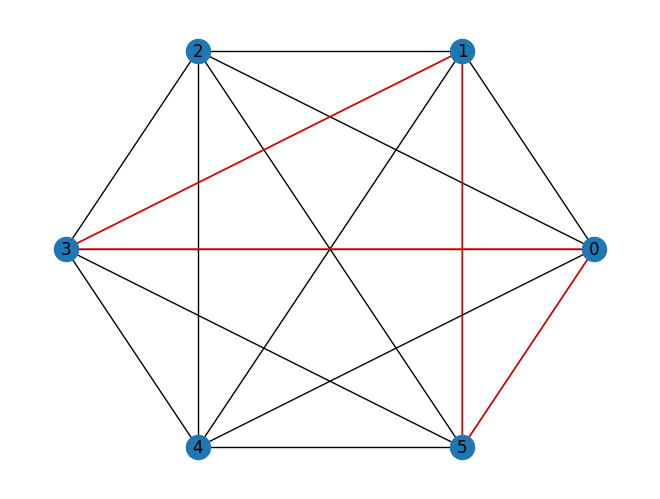

In [25]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K7 = nx.Graph()

for start, end, length in edges:
    K7.add_edge(start, end, length=length)


nx.draw_circular(K7, with_labels = True)
nx.draw_networkx_edges(K7, nx.circular_layout(K7), edgelist=edges_res, edge_color='r', arrows=True)
